In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [5]:
def is_correct(df):
    return (df['gt_table'] == df['pred_table']) & (df['gt_pageid'] == df['pred_pageid'])

In [6]:
predictions = pd.read_parquet('data/exp-6-row-locks/predictions.parquet')
predictions['is_correct'] = is_correct(predictions)
predictions['horizon'] = predictions['horizon'].astype(str)

in_lock_sequences = pd.read_parquet('data/exp-6-row-locks/in_lock_sequences.parquet')

In [30]:
predictions.head()

,in_lock_sequences_id,model,data,train_data_percent_used,epochs,batch_size,learning_rate,seq_length,test_split,val_split,...,disable_cache,model_weights,gt_table,gt_pageid,pred_table,pred_pageid,horizon_position,unique_id,is_correct,iteration
0,1,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,False,results/fixed/exp-6-row-locks/char__transforme...,orderline,65381,orderline,65381.0,1,f07bf120-fc9b-4e2b-9970-1f4494171032,True,1
1,2,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,False,results/fixed/exp-6-row-locks/char__transforme...,stock,2531,stock,37711.0,1,0693c4e8-5795-42cd-8307-cb636d7736a1,False,2
2,3,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,False,results/fixed/exp-6-row-locks/char__transforme...,orderline,65381,orderline,65381.0,1,c61b91c0-3652-4cca-bc89-1ad329712175,True,3
3,4,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,False,results/fixed/exp-6-row-locks/char__transforme...,stock,77377,stock,21111.0,1,4a42bc36-5f58-4d75-a4f9-b7480b87eaa9,False,4
4,5,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,False,results/fixed/exp-6-row-locks/char__transforme...,stock,77377,stock,21111.0,1,1d24bd15-cae7-444e-a1c6-cc60041d7f47,False,5


In [48]:
in_lock_sequences.head()

,in_lock_sequences,in_lock_sequences_id
0,customer 5 4 9 1 8 history 6 2 9 1 warehouse 4...,1
1,history 6 2 9 1 warehouse 4 district 4 custome...,2
2,warehouse 4 district 4 customer 3 9 1 3 8 hist...,3
3,district 4 customer 3 9 1 3 8 history 6 2 9 1 ...,4
4,customer 3 9 1 3 8 history 6 2 9 1 district 5 ...,5


---

## Data Sanity Checks

In [4]:
predictions.describe()

,in_lock_sequences_id,train_data_percent_used,epochs,batch_size,learning_rate,seq_length,test_split,val_split,vocab_size,patience,gt_pageid,pred_pageid,horizon_position,iteration
count,8.005883e+07,80058830.0,80058830.0,80058830.0,8.005883e+07,80058830.0,8.005883e+07,80058830.0,80058830.0,80058830.0,8.005883e+07,8.004642e+07,80058830.0,8.005883e+07
mean,3.622722e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,4.946564e+04,1.725425e+15,2.0,5.500000e+00
std,2.104680e+05,0.0,0.0,0.0,2.385245e-18,0.0,3.241851e-14,0.0,0.0,0.0,2.659063e+04,1.036102e+19,1.0,2.872281e+00
min,1.000000e+00,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00
25%,1.803920e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,2.741500e+04,3.857000e+03,1.0,3.000000e+00
50%,3.611360e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,6.494600e+04,6.359700e+04,2.0,5.500000e+00
75%,5.445760e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,6.687300e+04,6.627800e+04,3.0,8.000000e+00
max,7.293320e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,9.091000e+04,6.845867e+22,4.0,1.000000e+01


### Lets see how many groups of predicitons exist
There should be 40, which is 10 repitions by 4 horizons

In [52]:
unique_groups = predictions.drop(columns=['gt_pageid', 'pred_pageid', 'horizon_position', 'in_lock_sequences_id', 'gt_table', 'pred_table', 'horizon', 'unique_id']).drop_duplicates()

In [53]:
unique_groups.nunique()

model                       1
data                        1
train_data_percent_used     1
epochs                      1
batch_size                  1
learning_rate               1
seq_length                  1
test_split                  1
val_split                   1
vocab_size                  1
tokenization                1
patience                    1
results_dir                 1
experiment_name             1
shuffle                     1
add_start_end_tokens        1
add_row_id                  1
add_label_tokens            1
disable_train_shuffle       1
early_stopping              1
remove_system_tables        1
token_length_seq            1
lstm_pe                     1
naive_baseline              1
disable_cache               1
model_weights              40
is_correct                  2
dtype: int64

### Lets now check the number of rows for increasing number of horizons
This should be equal to a multiple of the number of rows when `horizon==1` (since each horzion positions is its own row)

In [54]:
num_of_pred = predictions[predictions['horizon'] == 1].shape[0]
num_of_pred

8005890

In [55]:
for horizon in predictions['horizon'].unique():
    assert num_of_pred * horizon == predictions[predictions['horizon'] == horizon].shape[0], (
        f"Number of predictions for horizon {horizon} is not correct.",
        f"Expected: {num_of_pred * horizon}",
        f"Actual: {predictions[predictions['horizon'] == horizon].shape[0]}",
        f"Difference: {num_of_pred * horizon - predictions[predictions['horizon'] == horizon].shape[0]}"
    )

AssertionError: ('Number of predictions for horizon 4 is not correct.', 'Expected: 32023560', 'Actual: 32023520', 'Difference: 40')

While I expected this assertion to hold, there may be a side-effect of sequence creation which larger horizons that I am not accounting for.

For example, depending if there is any overlap between sequence, it may account for there being less than exactly `num_of_pred * horizon`.

In [56]:
horizon_4_unqiue = predictions[predictions['horizon'] == 4]['model_weights'].groupby(predictions['model_weights'])
horizon_4_unqiue.count()

model_weights
results/fixed/exp-6-row-locks/char__transformer_20250115_155211_4a9914df-44e7-4709-b93f-2899a05761e4/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_164639_11d92135-a44b-4015-9a03-3e37c93283f8/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_173807_5849bb81-9b78-440c-a791-a0da558ef007/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_183129_be0f75cf-94dc-4ed3-b3af-5843eac87069/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_192614_f92ff2c9-4f61-464c-a2ce-8872fa2d0fdb/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_202048_efb07517-a3b6-42d6-87ca-ede888c20210/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_211559_dc0328e3-f880-49f2-a274-42326e1c06d5/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_220832_37086c9c-1b81-463f-b306-6beb9cac68fd/model.keras    32

In [57]:
horizon_4_unqiue.count().sum() == 32023520

True

Above looks at how many rows there are for each repition of `horizon==4`. They are all the same, so this means we have 4 less rows for each of the 10 reps.

This equates to only 1 less test example (since we split by horizon position, thus 4 less rows means 1 less lock prediciton at `horizon==4`)

### Lets look at the distribution of pageid values

In [58]:
predictions['pred_pageid'].min(), predictions['pred_pageid'].max(), predictions['pred_pageid'].mean(), predictions['pred_pageid'].std()

(0.0, 6.845866623866862e+22, 1725424805245443.2, 1.0361023799303481e+19)

Thats a very wide range of predicted page_ids. Lets checkout the histogram.

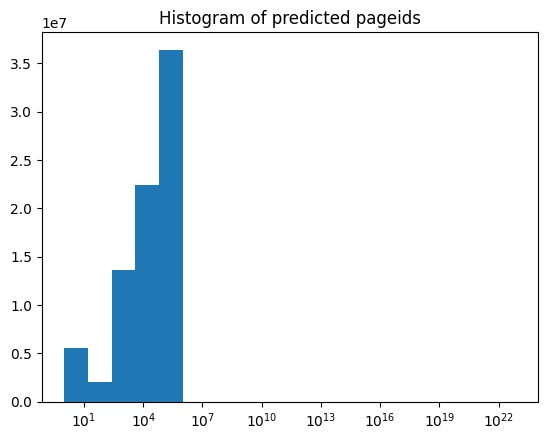

(8858, (80058830, 35))

In [59]:
max_log10 = np.log10(predictions['pred_pageid'].max())
plt.hist(predictions['pred_pageid'], bins=np.logspace(0, max_log10, 20))
plt.xscale('log')
plt.title('Histogram of predicted pageids')
plt.show()

(predictions['pred_pageid'] > 10e4).sum(), predictions.shape

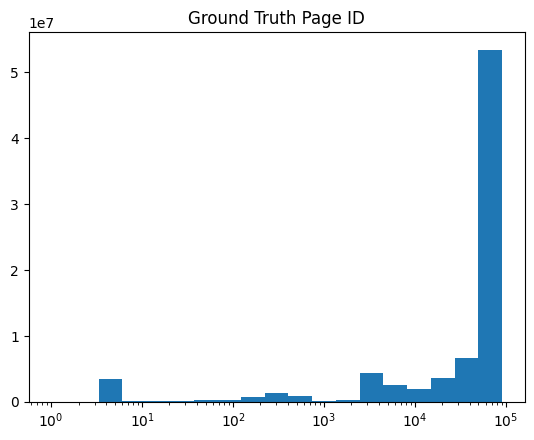

(0, (80058830, 35))

In [60]:
max_log10 = np.log10(predictions['gt_pageid'].max())
plt.hist(predictions['gt_pageid'], bins=np.logspace(0, max_log10, 20))
plt.xscale('log')
plt.title('Ground Truth Page ID')
plt.show()

(predictions['gt_pageid'] > 10e4).sum(), predictions.shape


Okay everything, looks normal. We just have a few outliers in the prediction, but the ground truth looks good.

## Global vs. Local Analysis

In [107]:
predictions_naive = pd.read_parquet('data/exp-10/predictions.parquet')
predictions_naive = predictions_naive[predictions_naive['data']=='data/fixed/row_locks.csv']
predictions_naive['is_correct'] = is_correct(predictions_naive)
predictions_naive['horizon'] = predictions_naive['horizon'].astype(str)

In [108]:
predictions_naive.head()

,in_lock_sequences_id,model,data,train_data_percent_used,epochs,batch_size,learning_rate,seq_length,test_split,val_split,...,naive_baseline,disable_cache,args_file,gt_table,gt_pageid,pred_table,pred_pageid,horizon_position,unique_id,is_correct
462812,354300,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,None,orderline,65381.0,orderline,65381.0,1,714650c6-33d6-452d-912b-46048235c834,True
462813,354300,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,None,stock,2531.0,stock,2531.0,2,714650c6-33d6-452d-912b-46048235c834,True
462814,354300,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,None,orderline,65381.0,orderline,65381.0,3,714650c6-33d6-452d-912b-46048235c834,True
462815,354301,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,None,stock,2531.0,orderline,65381.0,1,3e5a7f24-7a3c-4c2a-84f0-a8e301b203ca,False
462816,354301,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,None,orderline,65381.0,stock,2531.0,2,3e5a7f24-7a3c-4c2a-84f0-a8e301b203ca,False


In [109]:
correct_naive = predictions_naive.groupby(['horizon', 'unique_id'])['is_correct'].all().reset_index()
percent_correct_naive = correct_naive.groupby(['horizon'])['is_correct'].mean().reset_index()
percent_correct_naive.rename(columns={'is_correct': 'percent_correct'}, inplace=True)
percent_correct_naive.groupby('horizon')['percent_correct'].mean()

horizon
1    0.305856
2    0.275012
3    0.246477
4    0.218962
Name: percent_correct, dtype: float64

In [7]:
correct = predictions.groupby(['horizon', 'iteration', 'unique_id'])['is_correct'].all().reset_index()
percent_correct = correct.groupby(['horizon', 'iteration'])['is_correct'].mean().reset_index()
percent_correct.rename(columns={'is_correct': 'percent_correct'}, inplace=True)
percent_correct.groupby('horizon')['percent_correct'].mean()

horizon
1    0.461134
2    0.203645
3    0.143036
4    0.109782
Name: percent_correct, dtype: float64

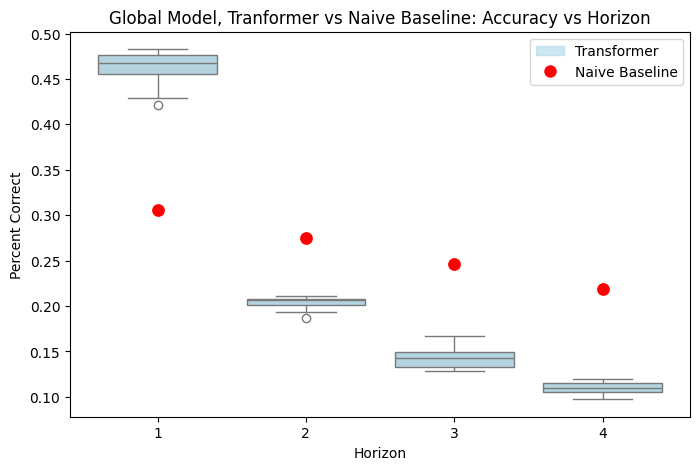

In [116]:


plt.figure(figsize=(8, 5))

# Box plot for percent_correct
sns.boxplot(x="horizon", y="percent_correct", data=percent_correct[['horizon', 'percent_correct']], color='lightblue', showfliers=True)

# Scatter plot for percent_correct_naive
sns.scatterplot(x="horizon", y="percent_correct", data=percent_correct_naive[['horizon', 'percent_correct']], color='red', marker='o', s=100, label='Naive')

# Labels and legend
plt.xlabel("Horizon")
plt.ylabel("Percent Correct")
plt.title("Global Model, Tranformer vs Naive Baseline: Accuracy vs Horizon")

box_patch = mpatches.Patch(color="lightblue", alpha=0.6, label="Transformer")
scatter_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="Naive Baseline")
plt.legend(handles=[box_patch, scatter_patch])

plt.savefig('plots/global_transformer_vs_naive_baseline_accuracy_vs_horizon.png')

### Per-table Analysis

In [80]:
correct_per_table = predictions.groupby(['horizon', 'gt_table', 'iteration', 'unique_id'])['is_correct'].all().reset_index()
percent_correct_per_table = correct_per_table.groupby(['horizon', 'iteration', 'gt_table'])['is_correct'].mean().reset_index()
percent_correct_per_table.rename(columns={'is_correct': 'percent_correct'}, inplace=True)
percent_correct_per_table.groupby(['horizon', 'gt_table'])['percent_correct'].mean().reset_index().pivot(index='gt_table', columns='horizon', values='percent_correct').sort_values(by='gt_table')

horizon,1,2,3,4
gt_table,,,,
customer,0.000155,0.000063,0.000060,0.000029
district,0.304831,0.198696,0.154803,0.129603
history,0.013870,0.171304,0.068230,0.046577
neworder,0.003461,0.001325,0.000635,0.000502
orderline,0.830073,0.785889,0.705931,0.515893
orders,0.000610,0.000528,0.000272,0.000195
stock,0.000018,0.000020,0.000008,0.000002
warehouse,0.278883,0.553775,0.368910,0.202675


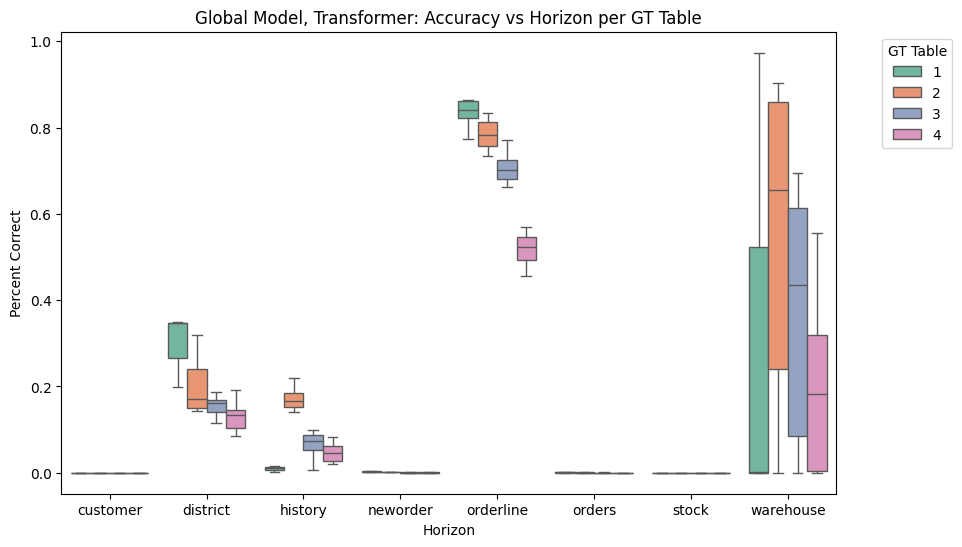

In [97]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="gt_table", y="percent_correct", hue="horizon", data=percent_correct_per_table, palette="Set2", showfliers=False)

# Labels and title
plt.xlabel("Horizon")
plt.ylabel("Percent Correct")
plt.title("Global Model, Transformer: Accuracy vs GT Table per Horizon")
plt.legend(title="Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

### Now lets see the Local models
I.e., the models trained on each dataset table seperately

In [86]:
predictions_row_sep = pd.read_parquet('data/row_sep/exp-11-row-locks/predictions.parquet')
predictions_row_sep['is_correct'] = is_correct(predictions_row_sep)
#predictions_row_sep['iteration'] = iteration(predictions_row_sep)
predictions_row_sep['horizon'] = predictions_row_sep['horizon'].astype(str)

In [130]:
pred_unique = predictions.groupby('horizon').nunique()

In [131]:
row_unique = predictions_row_sep.groupby('horizon').nunique()

In [94]:
row_sep_correct_per_table = predictions_row_sep.groupby(['horizon', 'gt_table', 'unique_id'])['is_correct'].all().reset_index()
percent_row_sep_correct_per_table = row_sep_correct_per_table.groupby(['horizon', 'gt_table'])['is_correct'].mean().reset_index()
percent_row_sep_correct_per_table.rename(columns={'is_correct': 'percent_correct'}, inplace=True)
percent_row_sep_correct_per_table.groupby(['horizon', 'gt_table'])['percent_correct'].mean().reset_index().pivot(index='gt_table', columns='horizon', values='percent_correct').sort_values(by='gt_table')

horizon,1,2,3,4
gt_table,,,,
customer,0.000244,0.000000,0.000000,0.000000
district,0.404493,0.163215,0.065943,0.025996
history,0.981766,0.963526,0.942366,0.923383
neworder,0.297527,0.188917,0.125400,0.074189
orderline,0.915226,0.839657,0.766529,0.693711
orders,0.067593,0.067644,0.060917,0.036229
stock,0.000022,0.000000,0.000000,0.000000
warehouse,1.000000,1.000000,1.000000,1.000000


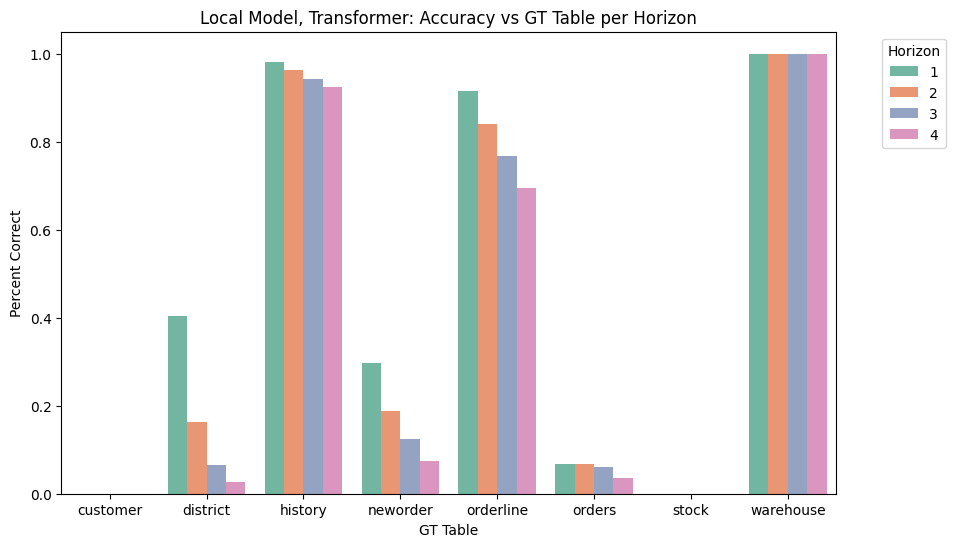

In [124]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="gt_table", y="percent_correct", hue="horizon", data=percent_row_sep_correct_per_table, palette="Set2")

# Labels and title
plt.xlabel("GT Table")
plt.ylabel("Percent Correct")
plt.title("Local Model, Transformer: Accuracy vs GT Table per Horizon")
plt.legend(title="Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

### Lets look at the Naive approach

In [102]:
predictions_row_sep_naive = pd.read_parquet('data/row_sep/exp-11-row-locks-naive/predictions.parquet')
predictions_row_sep_naive['is_correct'] = is_correct(predictions_row_sep_naive)
#predictions_row_sep['iteration'] = iteration(predictions_row_sep)
predictions_row_sep_naive['horizon'] = predictions_row_sep_naive['horizon'].astype(str)

In [103]:
row_sep_naive_correct_per_table = predictions_row_sep_naive.groupby(['horizon', 'gt_table', 'unique_id'])['is_correct'].all().reset_index()
percent_row_sep_naive_correct_per_table = row_sep_naive_correct_per_table.groupby(['horizon', 'gt_table'])['is_correct'].mean().reset_index()
percent_row_sep_naive_correct_per_table.rename(columns={'is_correct': 'percent_correct'}, inplace=True)
percent_row_sep_naive_correct_per_table.groupby(['horizon', 'gt_table'])['percent_correct'].mean().reset_index().pivot(index='gt_table', columns='horizon', values='percent_correct').sort_values(by='gt_table')

horizon,1,2,3,4
gt_table,,,,
customer,0.018787,0.018505,0.018505,0.018505
district,0.338382,0.118139,0.041524,0.014663
history,0.963540,0.945310,0.927080,0.908845
neworder,0.364113,0.265379,0.208267,0.169668
orderline,0.905012,0.831108,0.759403,0.689996
orders,0.465968,0.409541,0.368027,0.331756
stock,0.007967,0.007952,0.007952,0.007952
warehouse,1.000000,1.000000,1.000000,1.000000


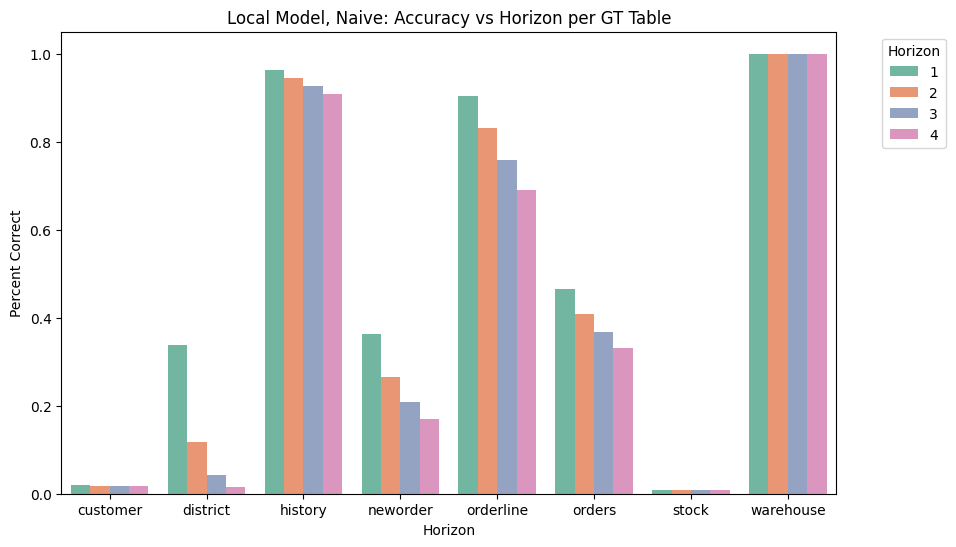

In [114]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="gt_table", y="percent_correct", hue="horizon", data=percent_row_sep_naive_correct_per_table, palette="Set2")

# Labels and title
plt.xlabel("Horizon")
plt.ylabel("Percent Correct")
plt.title("Local Model, Naive: Accuracy vs Horizon per GT Table")
plt.legend(title="Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

In [117]:
predictions_row_id = pd.read_parquet('data/row_sep/exp-11-row-locks-row_id/predictions.parquet')
predictions_row_id['is_correct'] = is_correct(predictions_row_id)
predictions_row_id['horizon'] = predictions_row_id['horizon'].astype(str)

In [119]:
test_1 = predictions_row_id.head()

In [120]:
row_id_correct_per_table = predictions_row_id.groupby(['horizon', 'gt_table', 'unique_id'])['is_correct'].all().reset_index()
percent_row_id_correct_per_table = row_id_correct_per_table.groupby(['horizon', 'gt_table'])['is_correct'].mean().reset_index()
percent_row_id_correct_per_table.rename(columns={'is_correct': 'percent_correct'}, inplace=True)
percent_row_id_correct_per_table.groupby(['horizon', 'gt_table'])['percent_correct'].mean().reset_index().pivot(index='gt_table', columns='horizon', values='percent_correct').sort_values(by='gt_table')

horizon,1,2,3,4
gt_table,,,,
customer,0.000234,0.000000,0.000000,0.000000
district,0.408659,0.164134,0.066672,0.026653
history,0.791927,0.629691,0.622813,0.553911
neworder,0.291207,0.184052,0.122631,0.078909
orderline,0.923475,NaN,NaN,NaN
orders,0.033641,0.022730,0.024751,0.014871
stock,0.000013,0.000000,0.000000,0.000000
warehouse,1.000000,1.000000,1.000000,1.000000


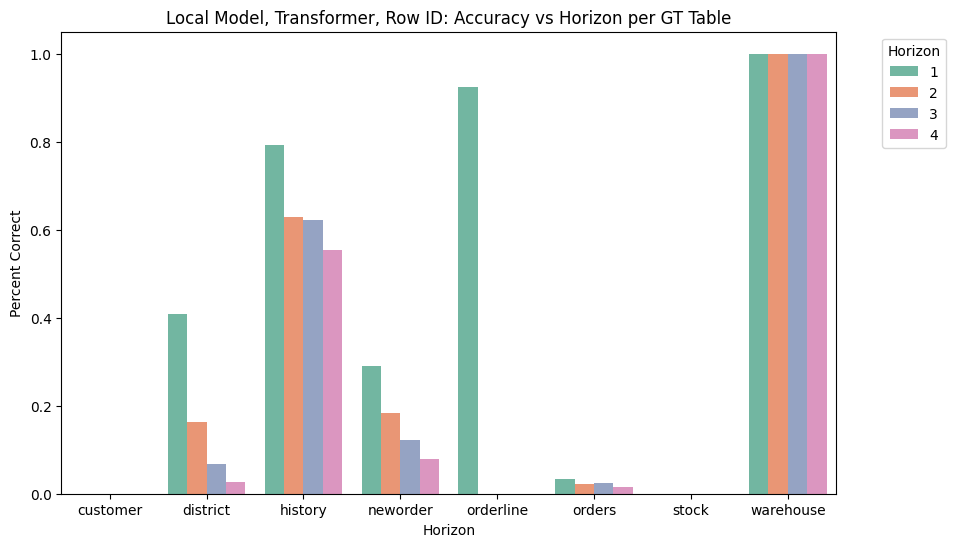

In [121]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="gt_table", y="percent_correct", hue="horizon", data=percent_row_id_correct_per_table, palette="Set2")

# Labels and title
plt.xlabel("Horizon")
plt.ylabel("Percent Correct")
plt.title("Local Model, Transformer, Row ID: Accuracy vs Horizon per GT Table")
plt.legend(title="Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()